# Iterative Solvers

Natasha Watkins

In [16]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

## Problem 1 + 2

In [17]:
def jacobi(A, b, tol=1e-8, maxiter=100, plot=False):
    
    error = 1e3
    it = 0
    
    D = np.diag(A)
    L = np.tril(A)
    U = np.triu(A)
    
    x = np.ones_like(b)  # Initial guess
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        x_new = x + (b - A @ x) / D
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
        
    if plot:
        plt.plot(range(1, it + 1), errors[:it])
        plt.semilogy()
        plt.xlim(1, it)
        plt.title('Covergence of Jacobi Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    return x

In [18]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [19]:
n = 5000
A = diag_dom(n)
b = np.random.random(n)

Converged in 15 iterations


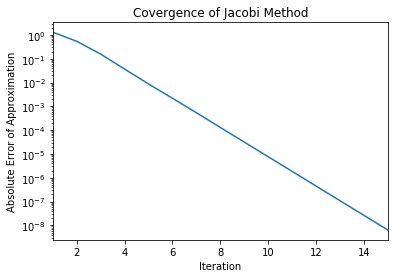

In [20]:
x_opt = jacobi(A, b, plot=True)

In [21]:
np.allclose(A @ x_opt, b, atol=1e-6)

True

## Problem 3

In [22]:
def gauss_seidel(A, b, tol=1e-8, maxiter=100, plot=False):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial gues
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - A[i, :].T @ x_new)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
        
    if plot:
        plt.plot(range(1, it + 1), errors[:it])
        plt.semilogy()
        plt.xlim(1, it)
        plt.title('Covergence of Gauss-Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.show()
        
    return x

Converged in 10 iterations


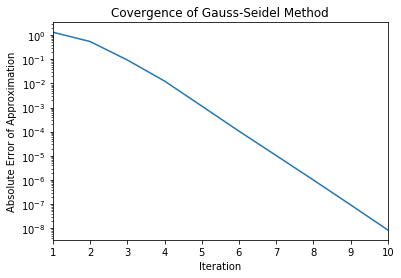

In [23]:
x_opt = gauss_seidel(A, b, plot=True)

In [25]:
np.allclose(A @ x_opt, b, atol=1e-6)

True

## Problem 4

In [26]:
def gauss_seidel_sparse(A, b, tol=1e-8, maxiter=100):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial guess
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]

            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - Aix)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
    else:
        print('Did not converge')
        
    return x

In [27]:
from scipy import sparse

A_sparse = sparse.csr_matrix(diag_dom(500))
b_sparse = np.random.random(500)

In [28]:
x_opt = gauss_seidel_sparse(A_sparse, b_sparse)
np.allclose(A_sparse @ x_opt, b_sparse)

Converged in 16 iterations


False

## Problem 5

In [29]:
def SOR(A, b, ω, tol=1e-8, maxiter=100, plot=False):
    
    error = 1e3
    it = 0
    
    x = np.ones_like(b)  # Initial gues
    x_new = x.copy()
    errors = np.empty(maxiter)
    
    while error > tol and it < maxiter:
        for i in range(len(x)):
            x_new[i] = x_new[i] + (ω / A[i, i]) * (b[i] - A[i, :].T @ x_new)  
        
        errors[it] = norm(x_new - x, np.inf)
        error = errors[it]
        it += 1
        x = x_new.copy()
        
    if it < maxiter:
        print(f'Converged in {it} iterations')
    else:
        print('Did not converge')
        
    return x

In [33]:
SOR(A, b, 1.3)

Converged in 24 iterations


array([0.00805133, 0.00496705, 0.01103715, ..., 0.00511524, 0.00311642,
       0.00277329])

## Problem 6